<a href="https://colab.research.google.com/github/Sajay1567/Test/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Mobile Price Range Prediction

# **Problem Description**

In today's competitive mobile phone market, smartphones come with various features that impact their price. To assist consumers and manufacturers in better understanding how different features affect pricing, this project aims to build a classification model to predict the price range of mobile devices based on their specifications.

# **Objective**
The objective of this project is to develop a machine learning model that classifies mobile devices into one of four price ranges (0, 1, 2, or 3) based on various hardware and software features.

# Data Description

The dataset consists of 2,000 entries with 21 columns, each representing different features of mobile devices. The goal of this project is likely to predict the mobile device's price range, which is the target variable (price_range).

 The columns represent various features such as:

battery_power: Battery power in mAh.

blue: Bluetooth (1 if present, 0 if not).

clock_speed: Speed at which the microprocessor executes instructions.

dual_sim: Dual SIM support (1 if present, 0 if not).

four_g: 4G support (1 if present, 0 if not).

int_memory: Internal memory in GB.

ram: Random Access Memory in MB.

px_height and px_width: Pixel resolution dimensions.

three_g: 3G support (1 if present, 0 if not).

touch_screen: Touchscreen (1 if present, 0 if not).

wifi: Wi-Fi support (1 if present, 0 if not).

# Import the dependancy

In [ ]:
# Import all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from datetime import datetime

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
# Install 1.2.0 version of xlrd because our data is in xls format
!pip install xlrd==2.0.1

In [ ]:
df = pd.read_csv('/content/data_mobile_price_range.xls.csv')

In [ ]:
# Check first five rows of the data
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# Checking for null data
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


**From the above data we can understand that there are no null values present in the data**

In [ ]:
# Checking last five rows of the data
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
#Transpose the describe the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [ ]:
df['price_range'].value_counts() # check the class imbalance

,count
price_range,
1,500
2,500
3,500
0,500


# EDA(Exploratory Data Analysis)

1. Battery - price range

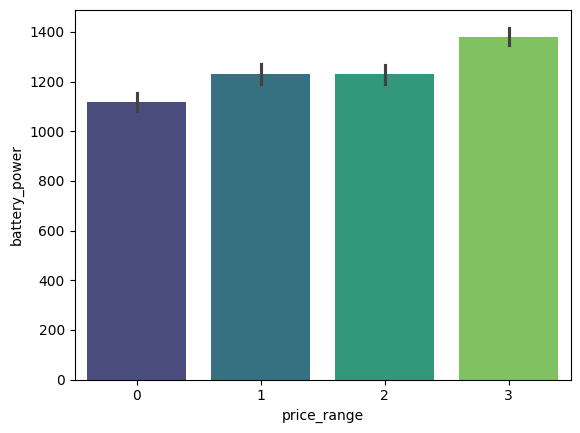

In [ ]:
sns.barplot(data=df,y='battery_power',x='price_range', palette="viridis")
plt.show()

Mid range and high mid range phone offers good battery Power

# 2. Ram - Price Range

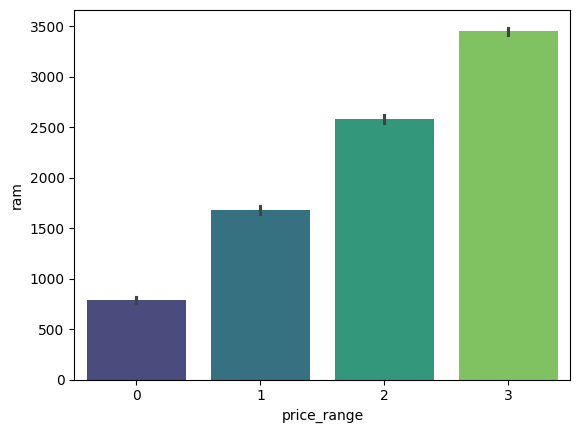

In [ ]:
sns.barplot(data=df,y='ram',x='price_range', palette="viridis")
plt.show()

# 3. Memory - Price Range

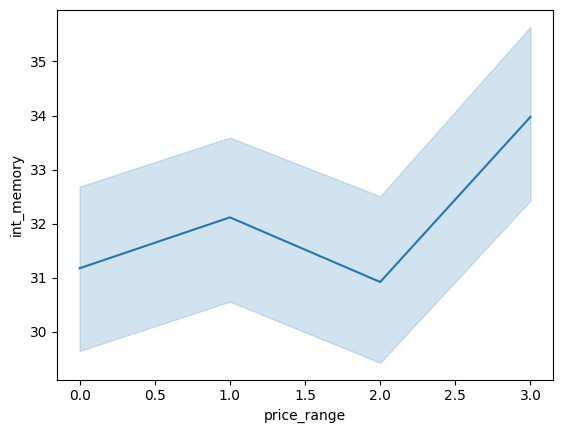

In [ ]:

sns.lineplot(data=df,x='price_range',y='int_memory')
plt.show()

**Low and high mid range smartphones provides same type of specification in terms of internal memory however high range smartphones packed with the good memory.**

# 4. Front mega pixel - price range

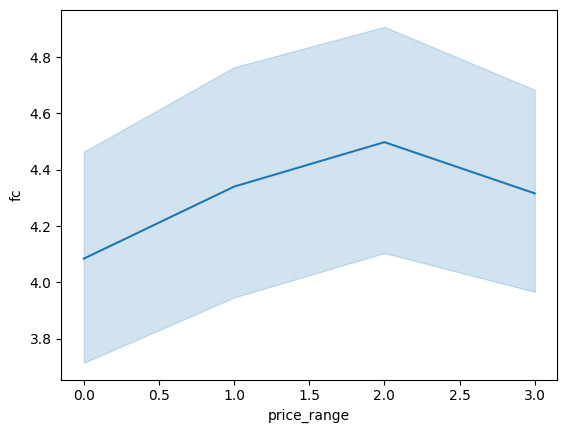

In [ ]:

sns.lineplot(data=df,x='price_range',y='fc')
plt.show()

# Expensive phones and mid range phone offer same specs in terms of front mega pixels camera but high mid range phones offers high quality front camera

# **5.How many 3g phones and 4g phones**

<Axes: xlabel='three_g', ylabel='count'>

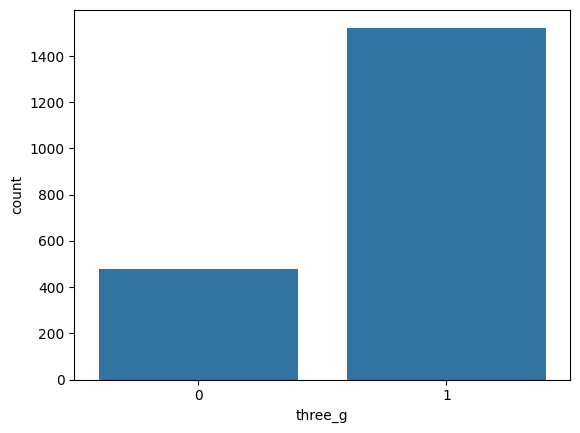

In [ ]:

sns.countplot(data=df,x='three_g')

In [ ]:

df['three_g'].value_counts()

,count
three_g,
1,1523
0,477


<Axes: xlabel='four_g', ylabel='count'>

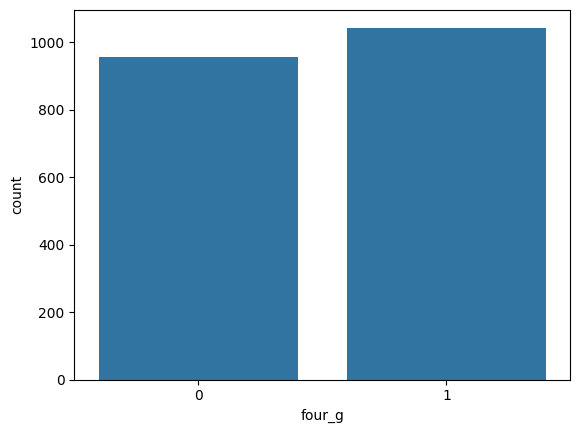

In [ ]:

sns.countplot(data=df,x='four_g')

In [ ]:

df['four_g'].value_counts()

,count
four_g,
1,1043
0,957


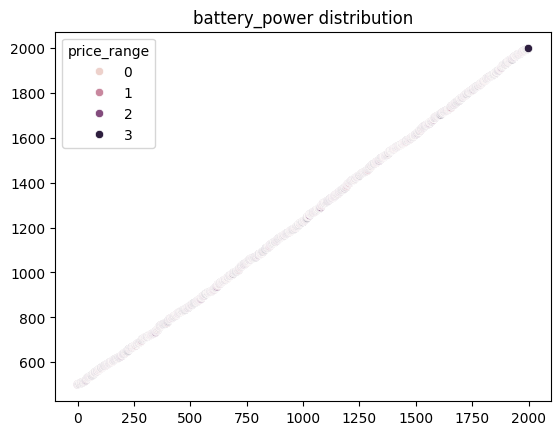

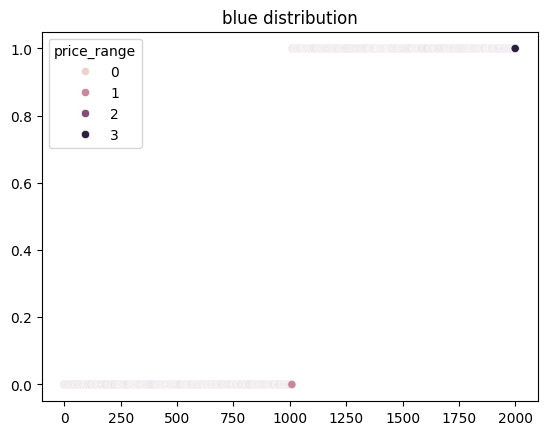

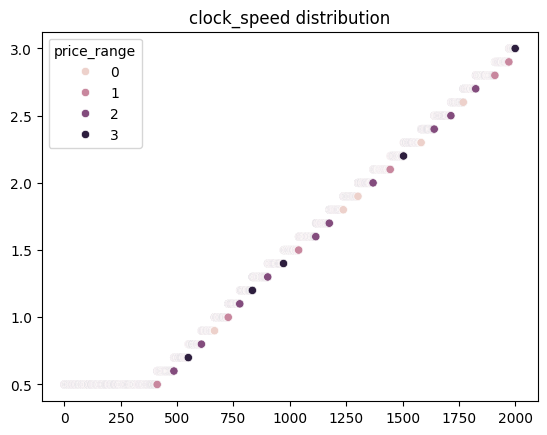

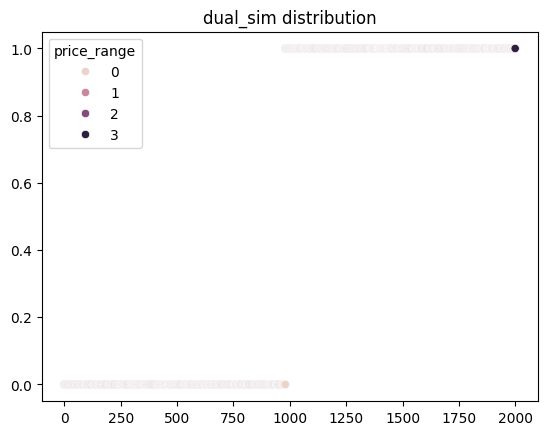

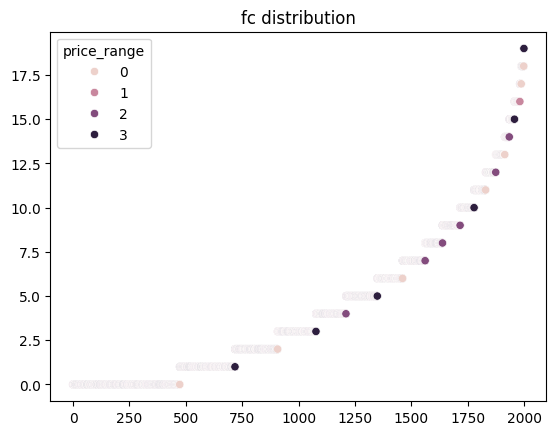

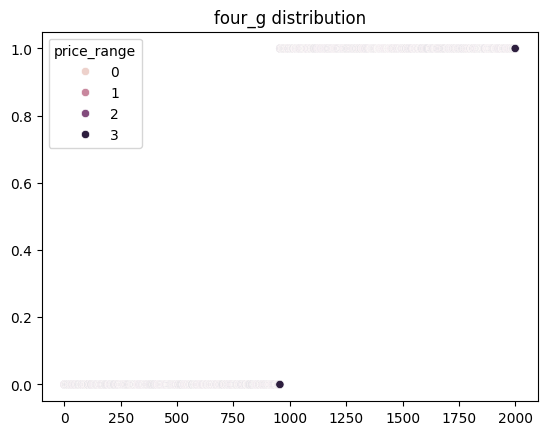

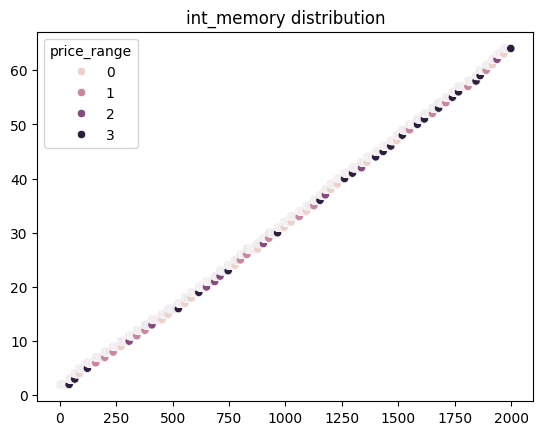

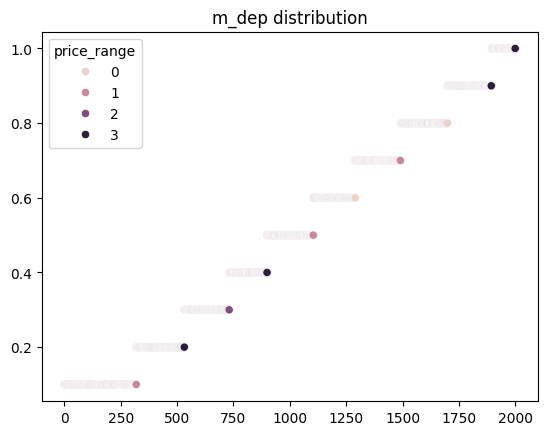

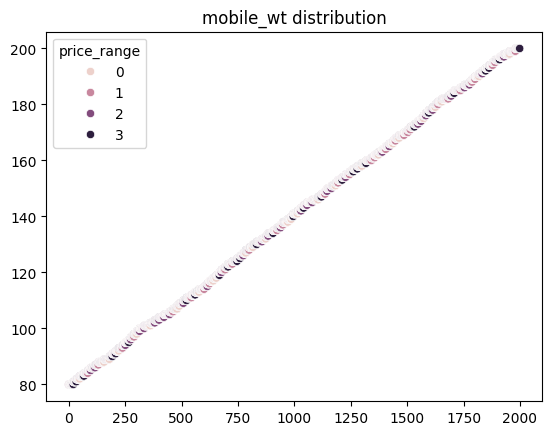

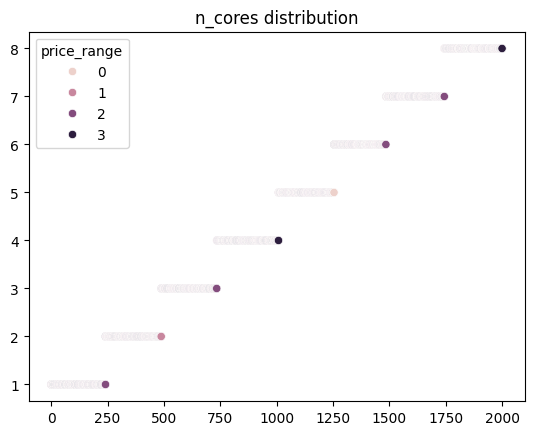

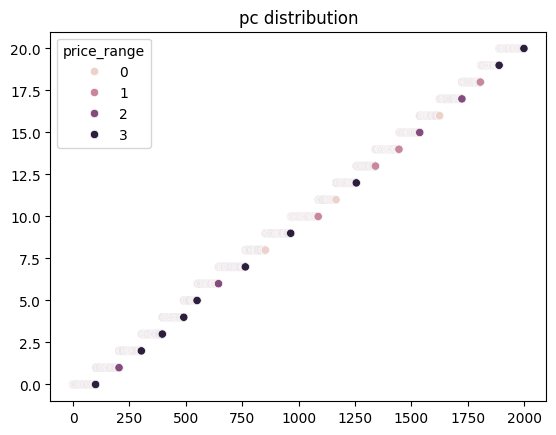

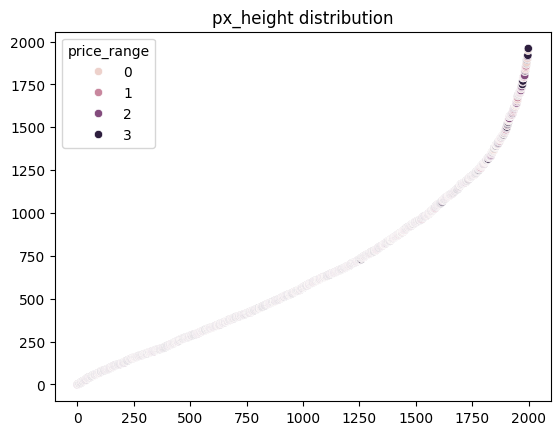

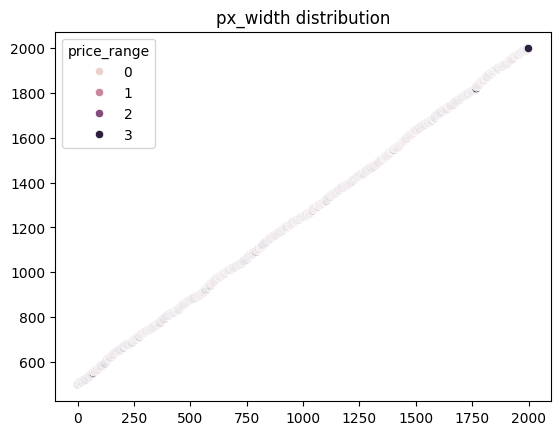

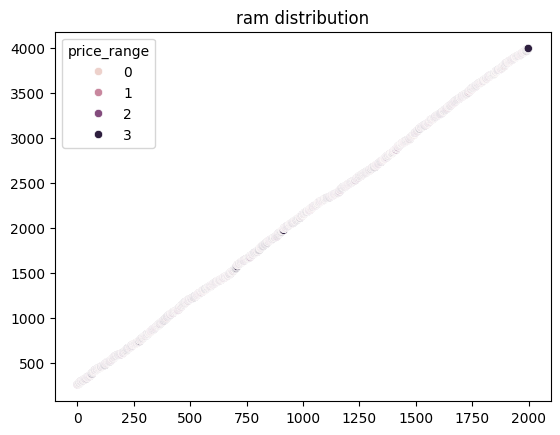

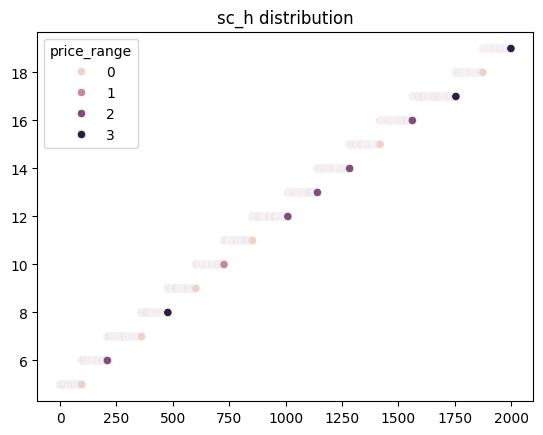

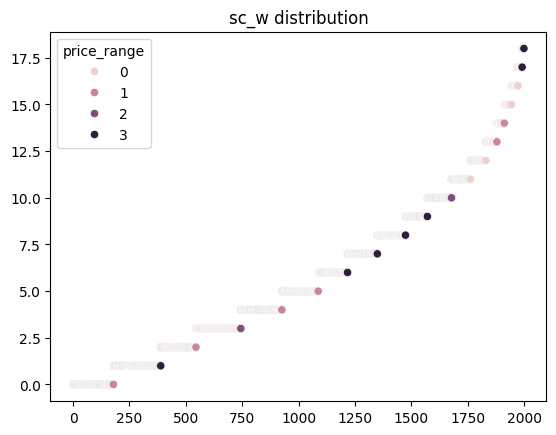

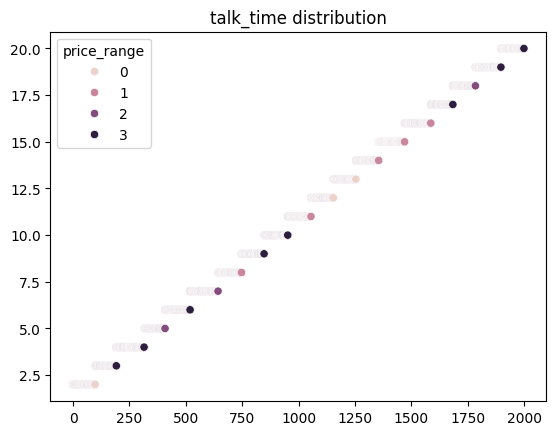

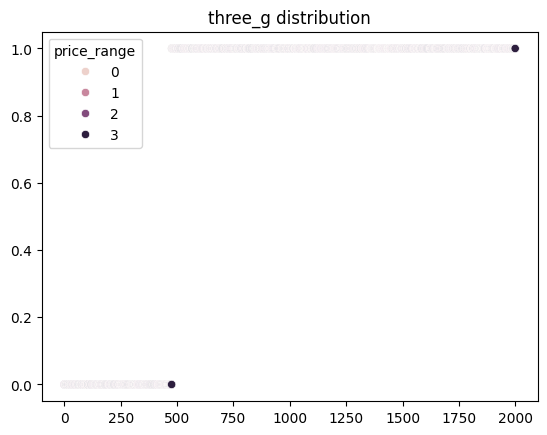

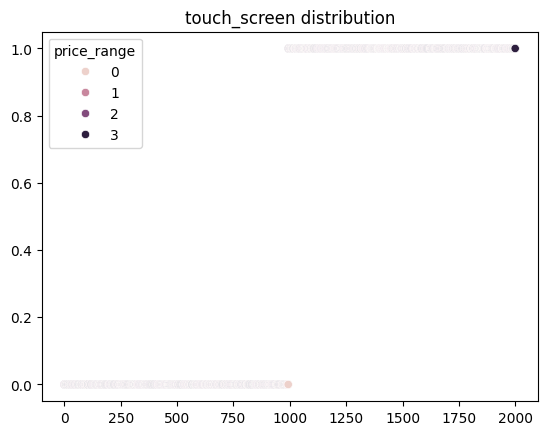

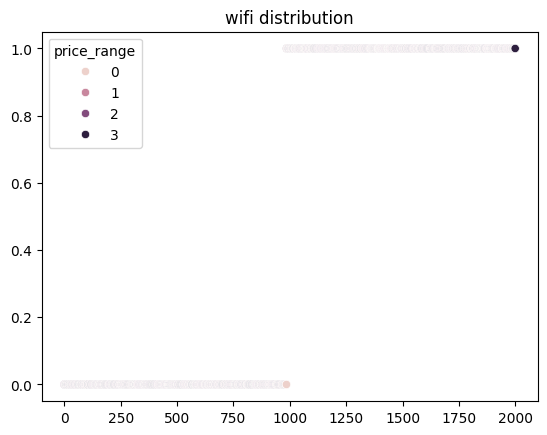

In [ ]:
#checking outliers
for i in (df.describe().columns[:-1]):
  sns.scatterplot(df,x=range(len(df[i])),y=np.sort(df[i]),hue='price_range')
  plt.title(i+' distribution')
  plt.show()

# **in this data we can see that there is very low outilers in the data.**

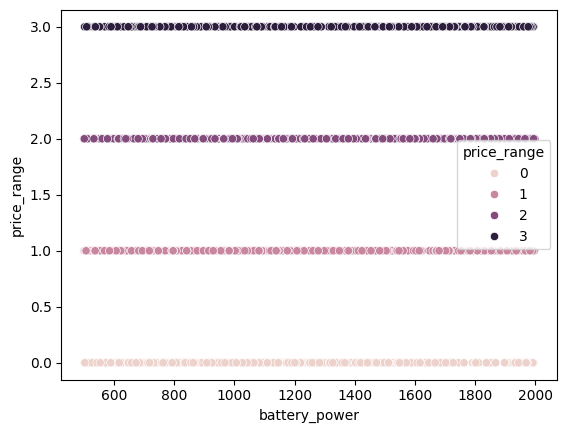

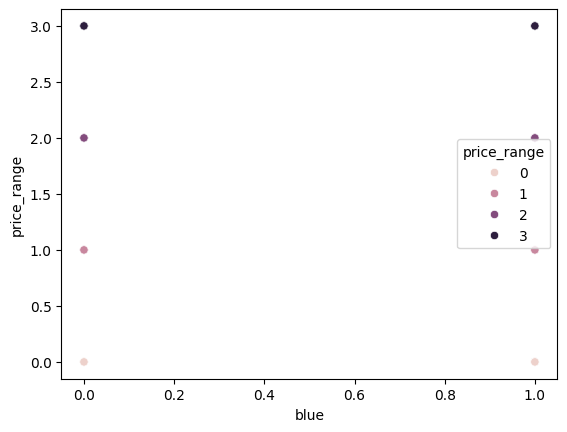

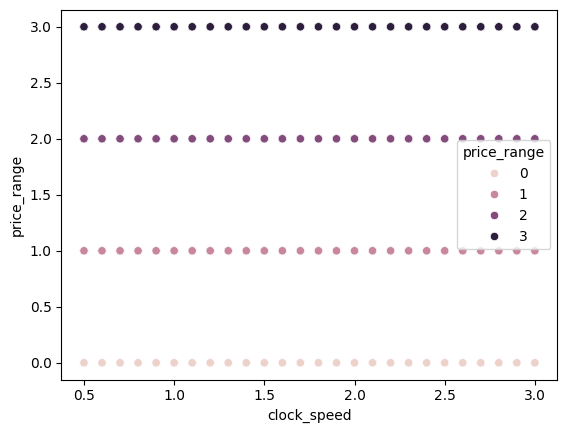

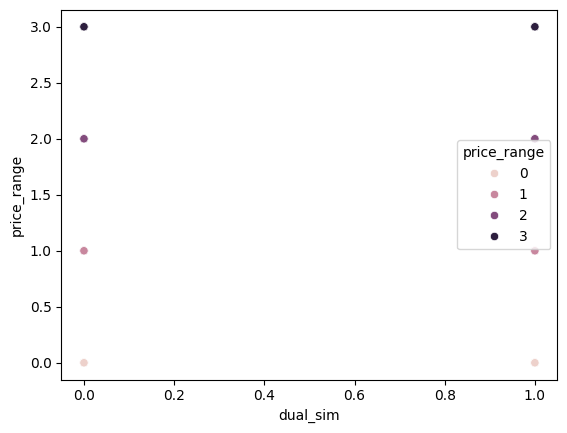

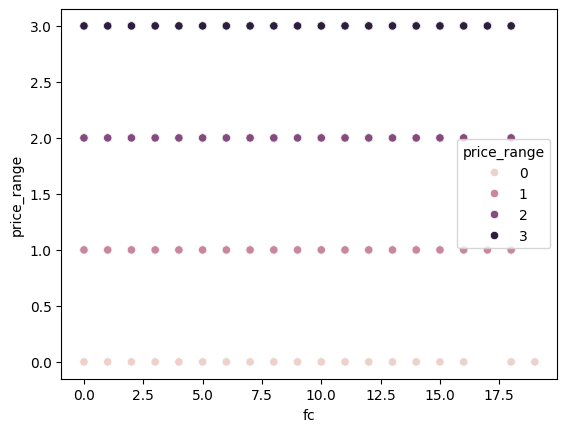

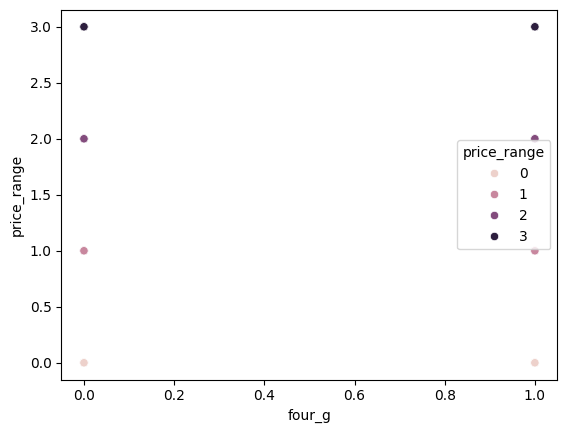

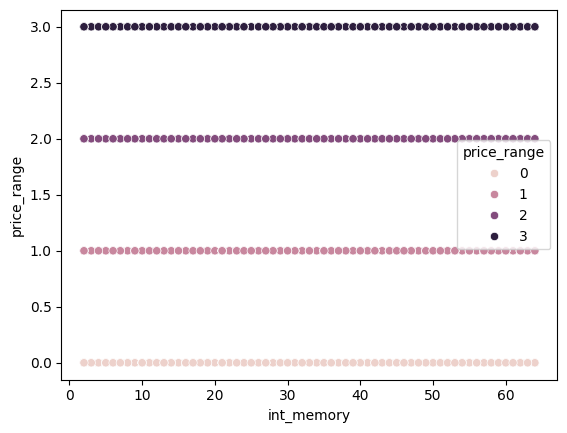

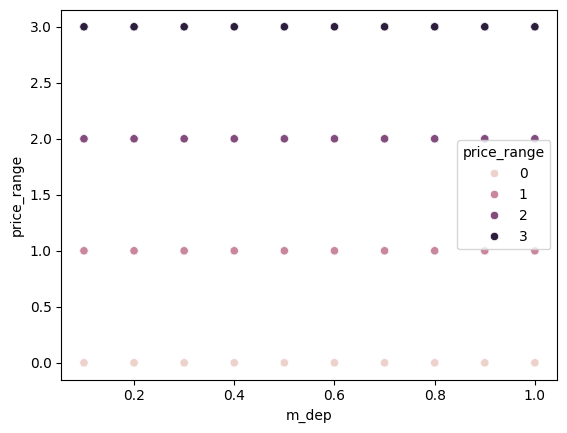

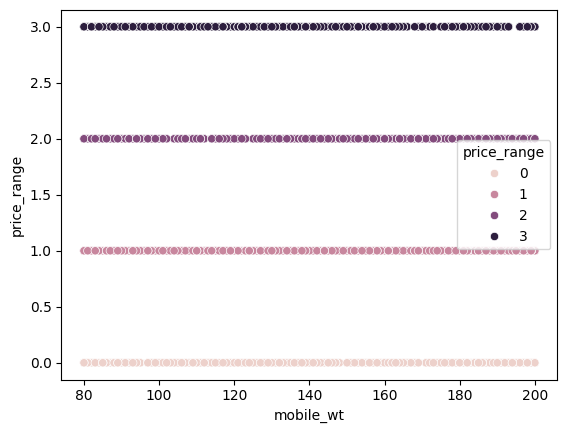

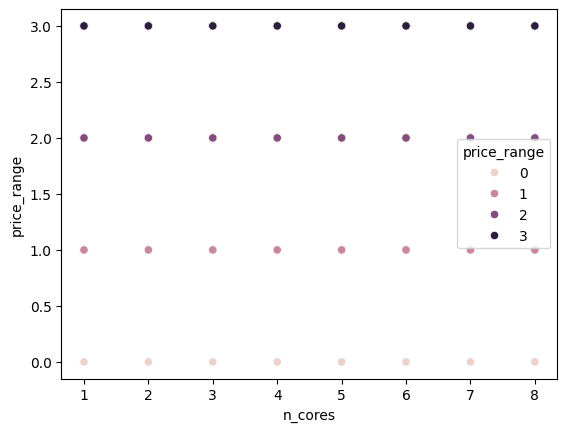

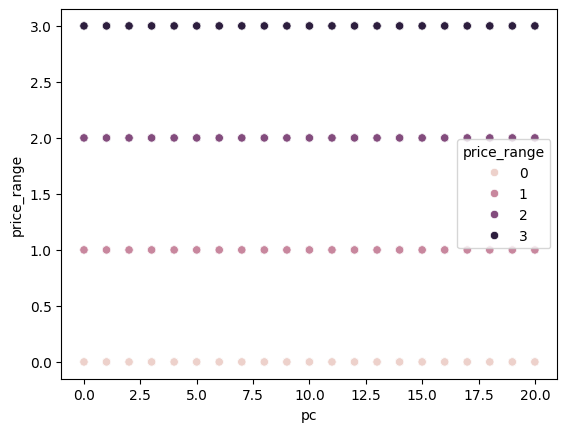

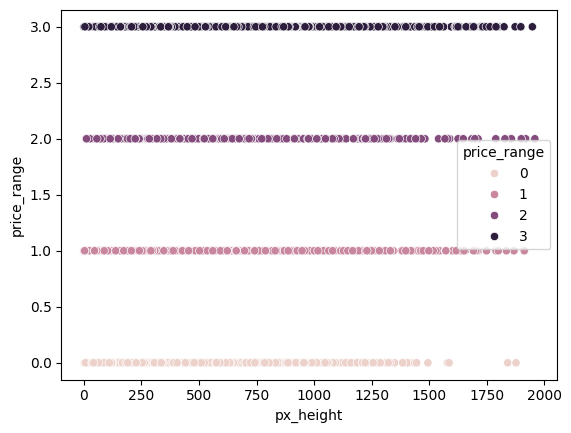

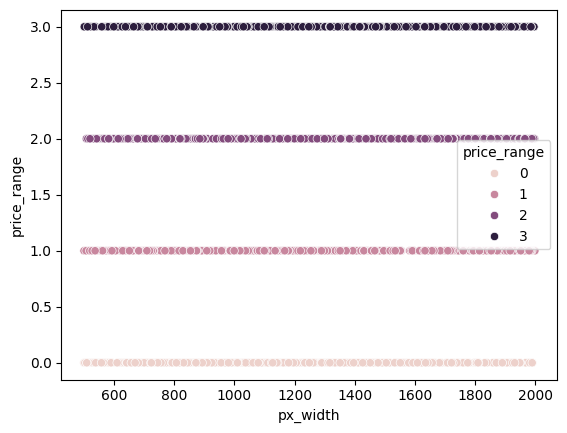

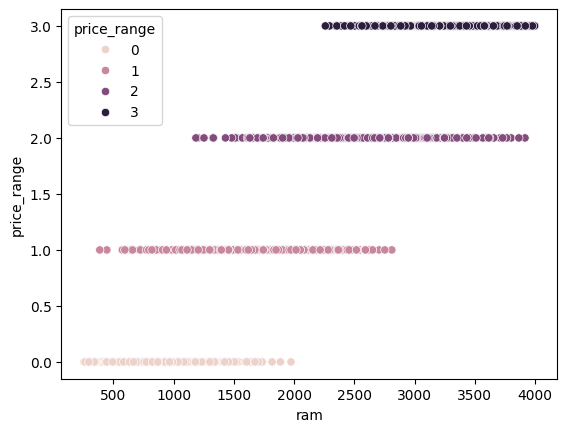

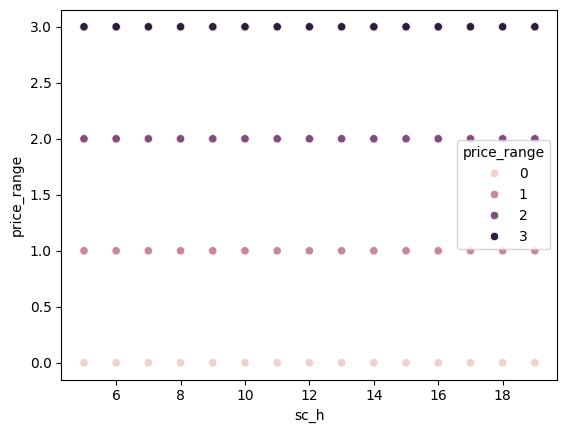

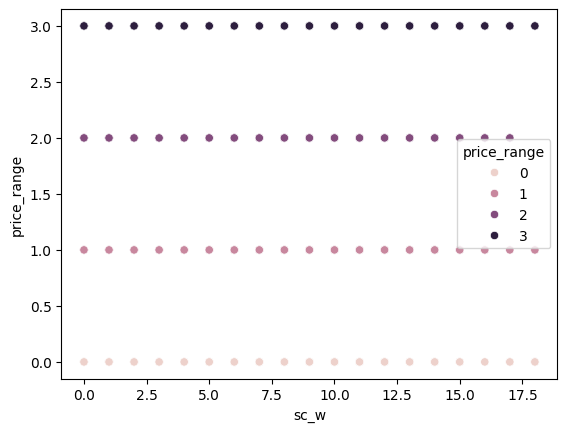

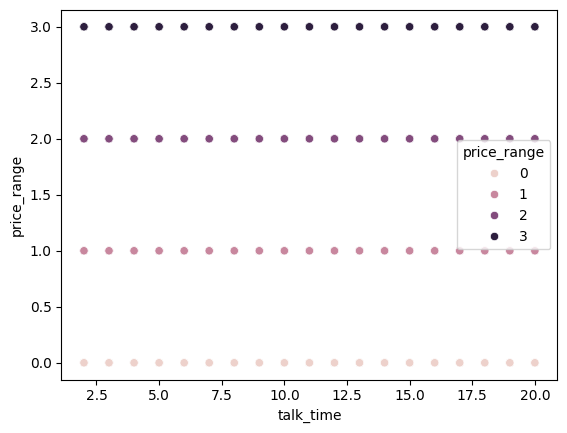

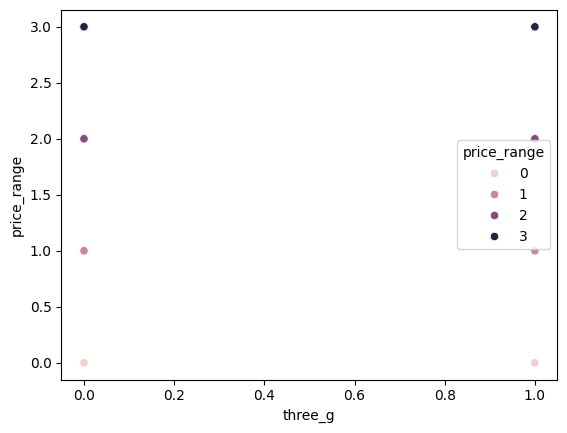

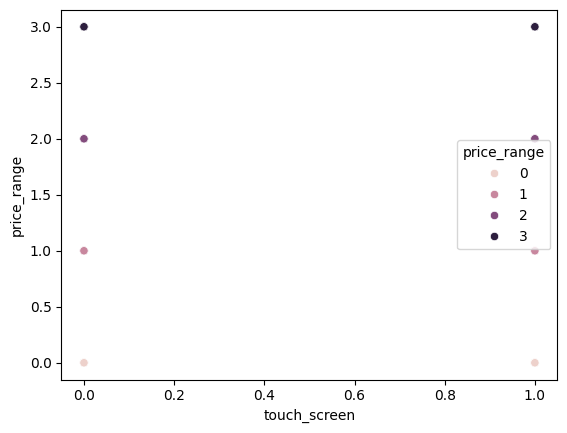

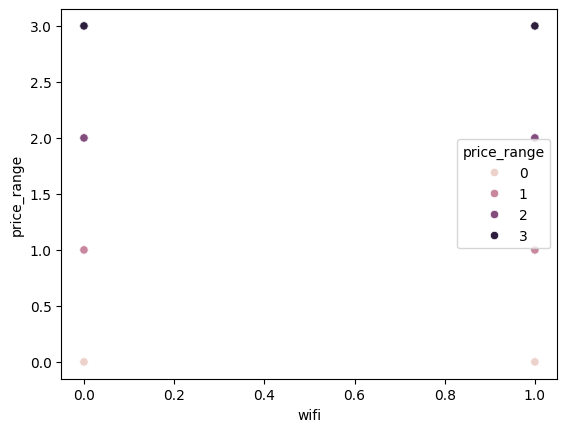

In [ ]:

#Checked the relationship between independent and dependent variable.
for i in df.describe().columns[:-1]:
   sns.scatterplot(df,x=i,y=df.describe().columns[-1],hue='price_range')
   plt.show()


# **Feature Engineering**

**check multicollinearity**

<function matplotlib.pyplot.show(close=None, block=None)>

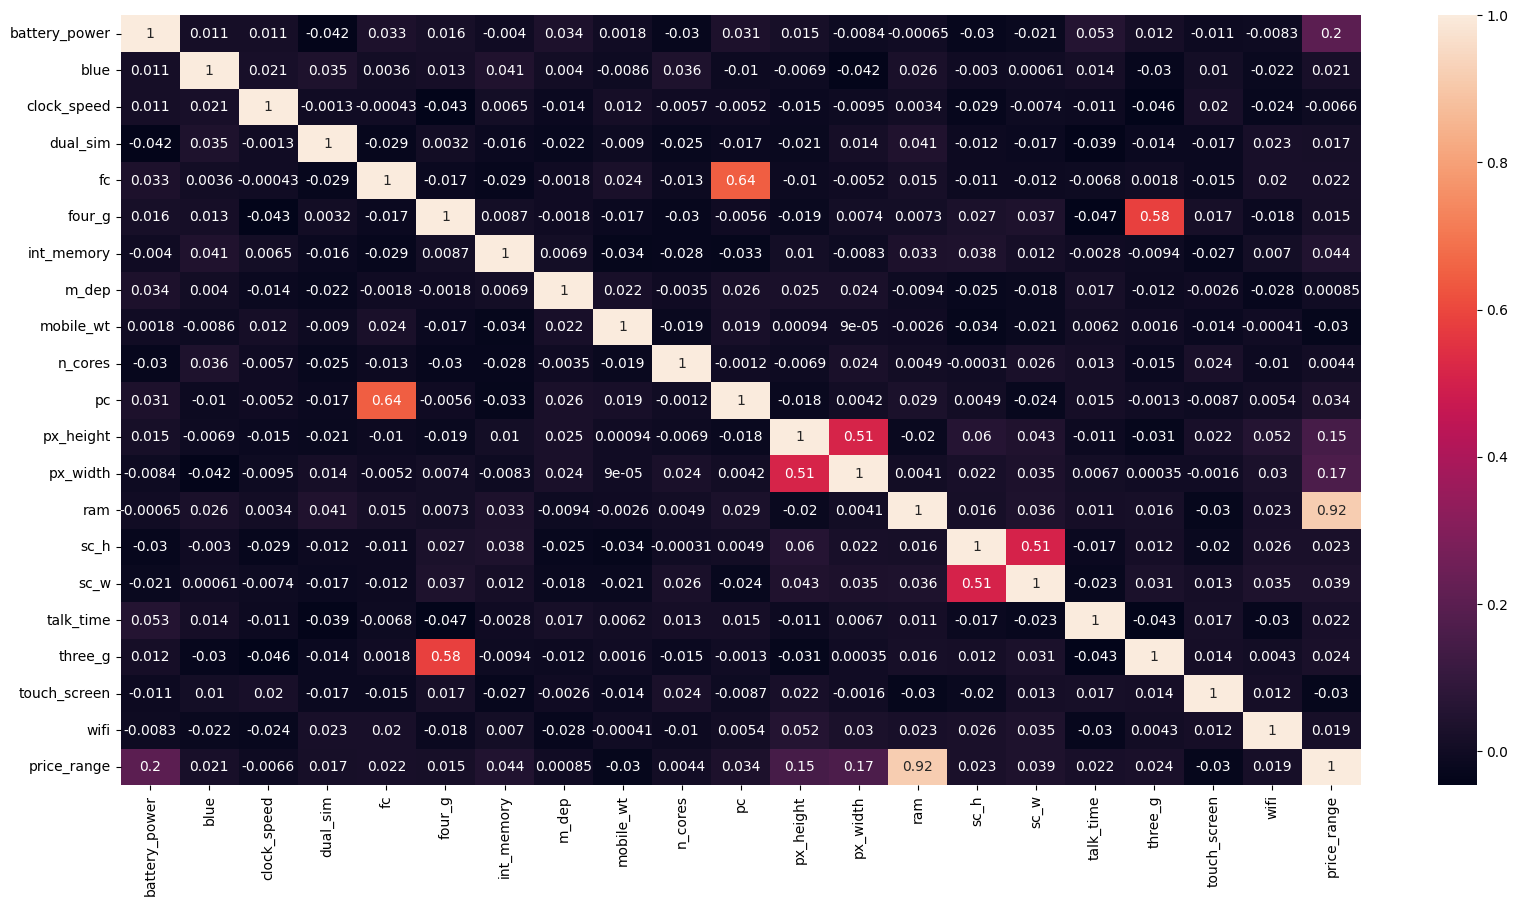

In [ ]:
#multicollinearity
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show

# after analysing heat map,no independent variable are highly correlated except ram

In [ ]:
#Created a feature by combining px_height and px_width, hence we dropped both features.
df['Pixels Dimension']=df['px_height']*df['px_width']

df.drop(columns=['px_height','px_width'],inplace=True)

In [ ]:
#Using function converted MB into GB.
def change(x):
  return x/1000

In [ ]:
#Applied the above function
df['ram']=df['ram'].apply(change)

In [ ]:
# 3G will work on 4G phones, but 4G won't work on 3G phones
df.drop(columns=['three_g'],inplace=True)

In [ ]:
#Since most of the smartphones comes with bluetooth feature, hence we dropped Bluetooth feature.
df.drop(columns=['blue'],inplace=True)

In [ ]:
#Created a feature by combining sc_h and sc_w, hence we dropped both features.
df['Screen Dimension'] = df['sc_h']* df['sc_w']
df.drop(columns=['sc_h','sc_w'],inplace=True)

In [ ]:
df.shape

(2000, 17)

In [ ]:
#Defined price_range as dependent variable and rest all the features as independent variable
dependent_variable ='price_range'
independent_varaible = list(set(df.columns.tolist())-{dependent_variable})

In [ ]:
# stored the independent and dependent values in x and y variable respectively
x=df[independent_varaible].values
y=df[dependent_variable].values

In [ ]:
# split the data into 4 parts x_train,x_test,y_train,y_test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0,stratify=y)

# **Feature scalling**

In [ ]:
#Created an object for StandardScaler
stand = StandardScaler()

In [ ]:
#Scalling
x_train = stand.fit_transform(x_train)
x_test = stand.transform(x_test)

# **Model Implementation**

**check overfitting**

In [ ]:
# A function to check overfitting using learning curve
def check_overfit(model_name):
  train_sizes,train_scores,test_scores = learning_curve(model_name,x_train,y_train,cv=5)
  train_scores_mean = np.mean(train_scores,axis=1)
  test_scores_mean = np.mean(test_scores,axis=1)
  plt.plot(train_sizes,train_scores_mean,label='Training score')
  plt.plot(train_sizes,test_scores_mean,label='Test score')

  plt.title("learning curve")
  plt.xlabel("training set size")
  plt.ylabel("Accuracy score")
  plt.legend(loc='best')
  plt.show()

**# MODEL-1 DECISION TREE**

In [ ]:
#Model
from sklearn.tree import DecisionTreeClassifier #Decisiontree
from sklearn.ensemble import RandomForestClassifier # Randomforest
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.ensemble import GradientBoostingClassifier #gradientboosting
from sklearn.linear_model import LogisticRegression #logistic
from xgboost import XGBClassifier # xgboost
from sklearn.naive_bayes import GaussianNB # naive bayes
from sklearn.svm import SVC # support vector machine
from sklearn.ensemble import StackingClassifier # stacking
from sklearn.ensemble import BaggingClassifier # Bagging

#evaluators
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score,classification_report # for evaluation metrics



import warnings
warnings.filterwarnings('ignore') # ignore the warning


In [ ]:

# created an object for decision tree classifier and then fit the train dataset into this model.
dec =DecisionTreeClassifier()
dec.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
#Predicting the model and checking the accuracy of the model
dec_pred = dec.predict(x_test)
dec_pred_accuracy = accuracy_score(dec_pred,y_test)
print(dec_pred_accuracy)

0.844


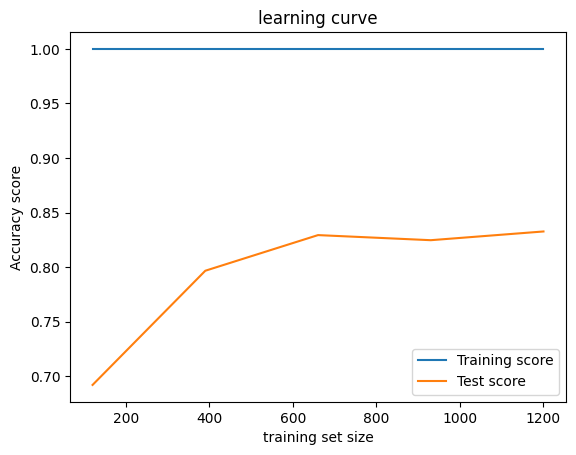

In [ ]:
from sklearn.model_selection import learning_curve
#learning curve
check_overfit(dec)

# **DECISION TREE(PRE PRUNNING)**

In [ ]:
#Set the parameters in the model
param_grid=param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [ 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [10, 20],
    'min_impurity_decrease': [0, 0.1, 0.2]
}

In [ ]:
#hyperparameter tunning using GridSearchCV
pre_dec = DecisionTreeClassifier()
pre_dec = GridSearchCV(pre_dec,param_grid=param_grid,scoring='accuracy',cv=5)
pre_dec.fit(x_train,y_train)
pre_dec_pred = pre_dec.predict(x_test)
pre_dec_accuracy = accuracy_score(pre_dec_pred,y_test)
pre_dec_accuracy

0.832

In [ ]:
#Got the best parameter through hyperparameter tunning
pre_dec.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 20,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
#Set the best parameter in this model
dec =DecisionTreeClassifier(criterion='gini',
 max_depth= 10,
 max_leaf_nodes= 20,
 min_impurity_decrease= 0,
 min_samples_leaf= 1,
 min_samples_split= 2,
 splitter= 'best')
dec.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20, min_impurity_decrease=0)

In [ ]:
#Predicting the model and checking accuracy after hyperparameter tunning
dec_pred = dec.predict(x_test)
dec_pred_accuracy = accuracy_score(dec_pred,y_test)
print(dec_pred_accuracy)

0.832


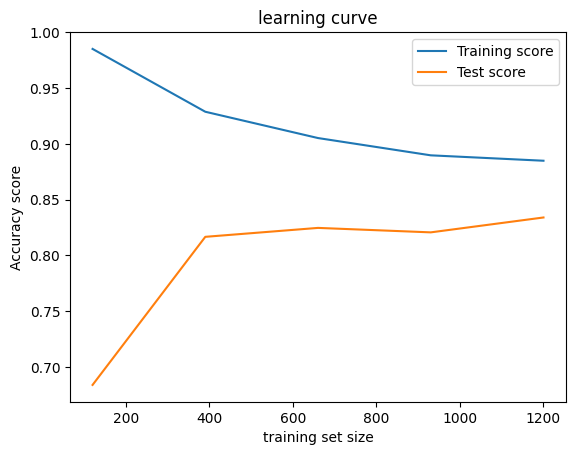

In [ ]:
#Model is performing well after hyperparameter tunning.
check_overfit(dec)

# **Model-2 RANDOM FOREST**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is the loaded dataset
# df = pd.read_csv('data_mobile_price_range.csv')

# 1. Prepare the data
X = df.drop('price_range', axis=1)  # Features
y = df['price_range']               # Target

# 2. Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create an object for the RandomForestClassifier with tuned hyperparameters
rf_tune = RandomForestClassifier(
    max_depth=15,
    max_features='sqrt',       # Correct alternative to 'auto'
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42             # Set random state for reproducibility
)

# 4. Train the model
rf_tune.fit(X_train, y_train)

# 5. Make predictions on the test set
rf_tune_pred = rf_tune.predict(X_test)

# 6. Calculate the accuracy of the model
rf_tune_accuracy = accuracy_score(y_test, rf_tune_pred)

# 7. Print the accuracy
print(f"Accuracy of Random Forest with tuned hyperparameters: {rf_tune_accuracy:.4f}")


Accuracy of Random Forest with tuned hyperparameters: 0.8850


# **MODEL -3 (K NEAREST NEIGHBORS)**

In [ ]:
#Basic Operations
import pandas as pd # data operation and data Wrangling
import numpy as np # number operation in array

#visualizing libraries
import matplotlib.pyplot as plt # data visualisation
import seaborn as sns # data visualisation


#data preprocessing
from sklearn.preprocessing import StandardScaler # standardization for feature scaling
from sklearn.model_selection import GridSearchCV # for hyperparameter tunning
from sklearn.model_selection import train_test_split # split the data into train and test
from sklearn.model_selection import learning_curve # check overfitting
from sklearn.ensemble import IsolationForest # anomaly detection
from sklearn.decomposition import PCA # principal component analysis
from sklearn.model_selection import RandomizedSearchCV #for hyperparameter tunning

#Model
from sklearn.tree import DecisionTreeClassifier #Decisiontree
from sklearn.ensemble import RandomForestClassifier # Randomforest
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.ensemble import GradientBoostingClassifier #gradientboosting
from sklearn.linear_model import LogisticRegression #logistic
from xgboost import XGBClassifier # xgboost
from sklearn.naive_bayes import GaussianNB # naive bayes
from sklearn.svm import SVC # support vector machine
from sklearn.ensemble import StackingClassifier # stacking
from sklearn.ensemble import BaggingClassifier # Bagging

#evaluators
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score,classification_report # for evaluation metrics



import warnings
warnings.filterwarnings('ignore') # ignore the warning

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'df' is the loaded dataset
# df = pd.read_csv('data_mobile_price_range.csv')

# 1. Prepare the data
X = df.drop('price_range', axis=1)  # Features
y = df['price_range']               # Target

# 2. Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train the KNN model (MODEL -3)
knn = KNeighborsClassifier(n_neighbors=5)  # Set the number of neighbors (you can tune this)
knn.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# 5. Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# 6. Print the accuracy
print(f"Accuracy of K-Nearest Neighbors (KNN) model: {knn_accuracy:.4f}")


Accuracy of K-Nearest Neighbors (KNN) model: 0.2400


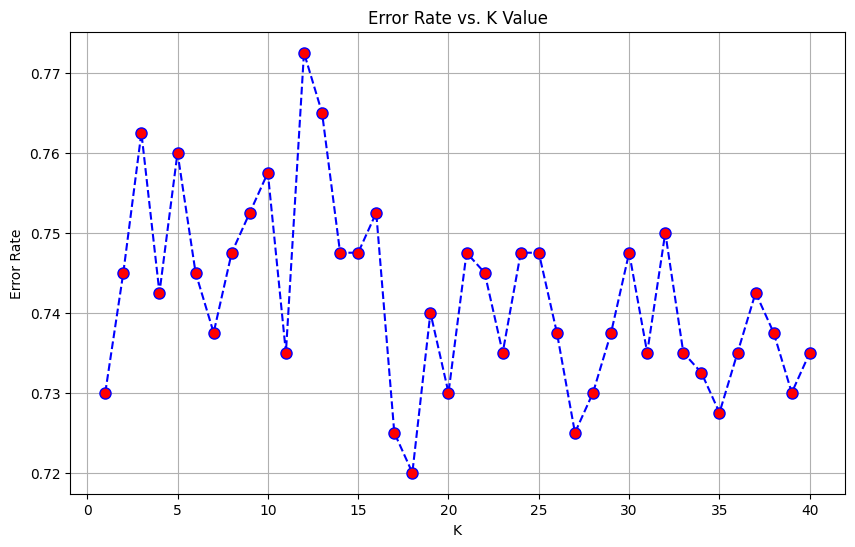

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming 'df' is the loaded dataset
# df = pd.read_csv('data_mobile_price_range.csv')

# 1. Prepare the data
X = df.drop('price_range', axis=1)  # Features
y = df['price_range']               # Target

# 2. Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. List to store error rates for different values of k
error_rate = []

# 4. Loop through values of k from 1 to 40
for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)

    # Calculate the error rate (1 - accuracy)
    error_rate.append(1 - accuracy_score(y_test, y_pred_k))

# 5. Plot error rate vs. k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()


# **MODEL-4 LOGISTIC REGRESSION**

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:  {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy:  0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       105
           1       0.90      0.93      0.92        91
           2       0.90      0.87      0.88        92
           3       0.94      0.95      0.94       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



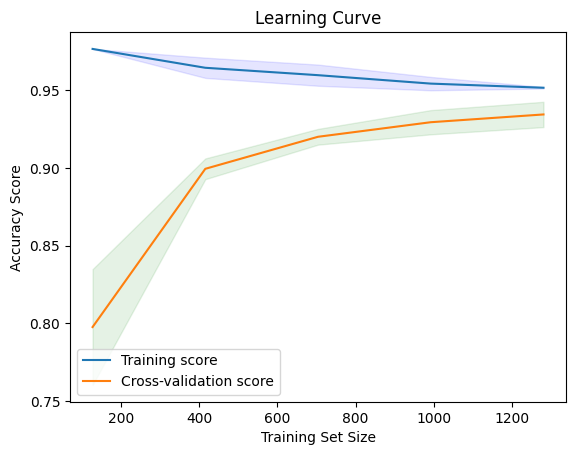

In [ ]:
# Step 1: Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],      # Regularization strength
    'penalty': ['l2'],                 # L1 and L2 penalties are supported
    'solver': ['lbfgs', 'liblinear']   # Solvers available for logistic regression
}

logreg = LogisticRegression(multi_class='auto', max_iter=1000)
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Step 4: Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

# Step 5: Train the model using the best parameters
best_model = LogisticRegression(**best_params, multi_class='auto', max_iter=1000)
best_model.fit(X_train_scaled, y_train)

# Step 6: Predicting and evaluating the model
y_pred = best_model.predict(X_test_scaled)

# Print classification report and accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 7: Plotting the Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy'
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()


# **Model-5 Naive Bayes**

Accuracy:  0.785
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       105
           1       0.74      0.67      0.71        91
           2       0.63      0.73      0.67        92
           3       0.87      0.81      0.84       112

    accuracy                           0.79       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.79      0.79      0.79       400



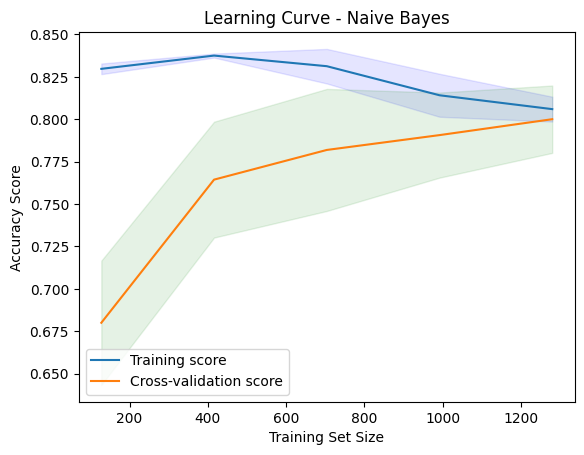

In [ ]:


# Step 1: Train the Naive Bayes model (GaussianNB does not have hyperparameters for tuning in the same way)
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Step 2: Predicting and evaluating the model
y_pred = nb.predict(X_test_scaled)

# Print classification report and accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 3: Plotting the Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    nb, X_train_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy'
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)

plt.title('Learning Curve - Naive Bayes')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()


# **Model-6 XgBoost**

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Accuracy:  0.895
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       105
           1       0.86      0.90      0.88        91
           2       0.82      0.85      0.83        92
           3       0.93      0.88      0.91       112

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



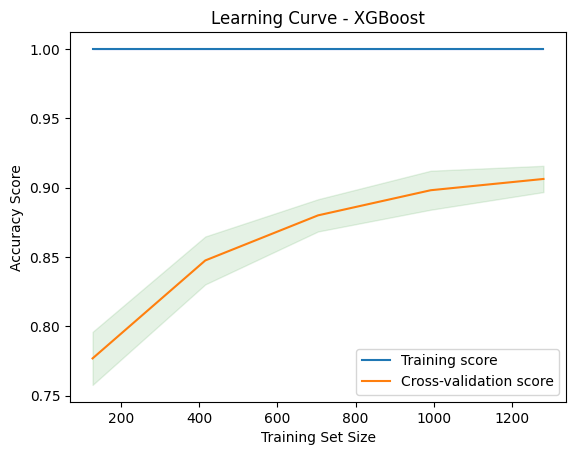

In [ ]:
# Step 1: Hyperparameter tuning using GridSearchCV for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Step 2: Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

# Step 3: Train the model using the best parameters
best_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss')
best_model.fit(X_train_scaled, y_train)

# Step 4: Predicting and evaluating the model
y_pred = best_model.predict(X_test_scaled)

# Print classification report and accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 5: Plotting the Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy'
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)

plt.title('Learning Curve - XGBoost')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()


# **Model -7 Support Vector Machine**

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy:  0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       105
           1       0.90      0.93      0.92        91
           2       0.89      0.88      0.89        92
           3       0.95      0.94      0.94       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



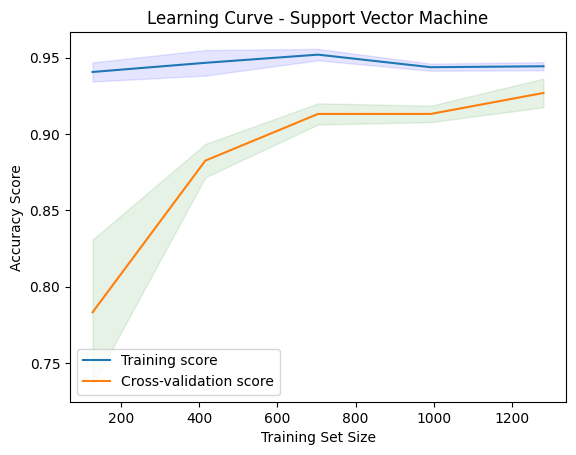

In [ ]:
# Step 1: Hyperparameter tuning using GridSearchCV for Support Vector Machine (SVM)
param_grid = {
    'C': [0.1, 1, 10, 100],       # Regularization parameter
    'gamma': ['scale', 'auto'],   # Kernel coefficient
    'kernel': ['rbf', 'poly', 'linear']  # Different kernel types
}

svm = SVC()
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Step 2: Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

# Step 3: Train the model using the best parameters
best_model = SVC(**best_params)
best_model.fit(X_train_scaled, y_train)

# Step 4: Predicting and evaluating the model
y_pred = best_model.predict(X_test_scaled)

# Print classification report and accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 5: Plotting the Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy'
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)

plt.title('Learning Curve - Support Vector Machine')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()


# **Model 8 Stacking**

Accuracy:  0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       105
           1       0.90      0.93      0.92        91
           2       0.87      0.86      0.86        92
           3       0.93      0.92      0.92       112

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



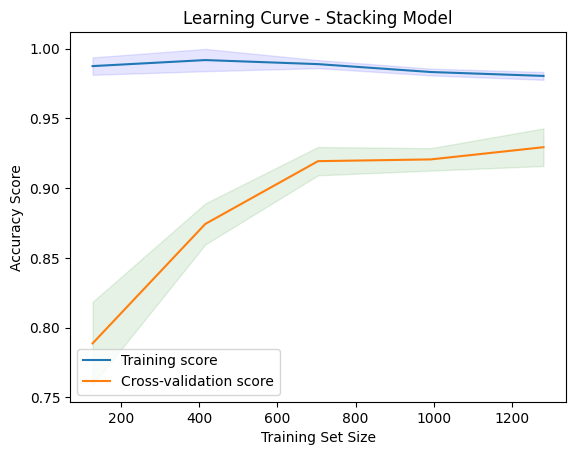

In [ ]:
# Step 1: Preprocessing - separating features and target variable
X = df.drop('price_range', axis=1)  # Features
y = df['price_range']               # Target variable

# Step 2: Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Define the base classifiers
base_classifiers = [
    ('logreg', LogisticRegression(multi_class='auto', max_iter=1000)),
    ('naive_bayes', GaussianNB()),
    ('xgboost', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
]

# Step 5: Define the stacking classifier
stacking_model = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression())

# Step 6: Train the stacking model
stacking_model.fit(X_train_scaled, y_train)

# Step 7: Predicting and evaluating the model
y_pred = stacking_model.predict(X_test_scaled)

# Print classification report and accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 8: Plotting the Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    stacking_model, X_train_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy'
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)

plt.title('Learning Curve - Stacking Model')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()


# **Evaluation**

In [ ]:
# Initialize a dictionary to store model names and accuracies
accuracy_results = {}

# Step 1: Train different models and calculate their accuracy

## Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
accuracy_log = accuracy_score(y_test, y_pred_log)
accuracy_results['Logistic Regression'] = accuracy_log

## Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_results['Naive Bayes'] = accuracy_nb

## XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_results['XGBoost'] = accuracy_xgb

## Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_results['Support Vector Machine'] = accuracy_svm

# Step 2: Convert the results to a DataFrame
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy'])

# Step 3: Sort the DataFrame by accuracy in descending order
accuracy_df_sorted = accuracy_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Step 4: Display the sorted accuracies
print("Sorted Model Accuracies:")
print(accuracy_df_sorted)

# Step 5: Evaluation of the best model
best_model_name = accuracy_df_sorted.loc[0, 'Model']
print(f"\nBest Model: {best_model_name}")

if best_model_name == 'Logistic Regression':
    best_model_pred = y_pred_log
elif best_model_name == 'Naive Bayes':
    best_model_pred = y_pred_nb
elif best_model_name == 'XGBoost':
    best_model_pred = y_pred_xgb
elif best_model_name == 'Support Vector Machine':
    best_model_pred = y_pred_svm

# Step 6: Print the classification report for the best model
print(f"\nClassification Report for {best_model_name}:")
print(classification_report(y_test, best_model_pred))


Sorted Model Accuracies:
                    Model  Accuracy
0     Logistic Regression    0.9300
1                 XGBoost    0.8950
2  Support Vector Machine    0.8675
3             Naive Bayes    0.7850

Best Model: Logistic Regression

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       105
           1       0.90      0.93      0.92        91
           2       0.90      0.87      0.88        92
           3       0.94      0.95      0.94       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



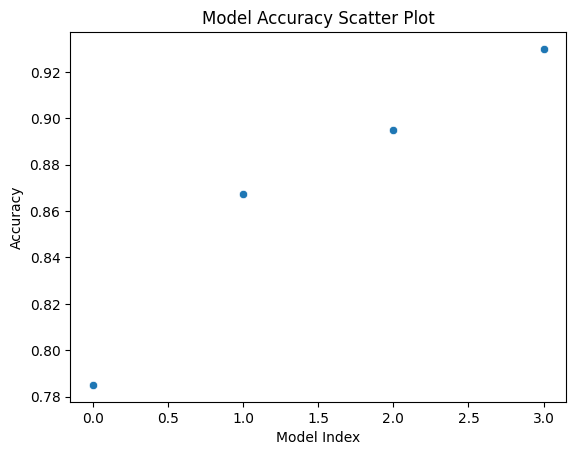

In [ ]:
# Assuming accuracy_df_sorted is the DataFrame with sorted accuracies
# Plot the scatter plot of accuracies
sns.scatterplot(x=range(len(accuracy_df_sorted)), y=np.sort(accuracy_df_sorted['Accuracy']))
plt.title("Model Accuracy Scatter Plot")
plt.xlabel("Model Index")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
# confusion_matrix
def conf(x,y):
  sns.heatmap(confusion_matrix(x,y_test),annot=True)
  plt.title(y)
  plt.show()

def classi(x,y):
  print(y)
  print(classification_report(x,y_test))

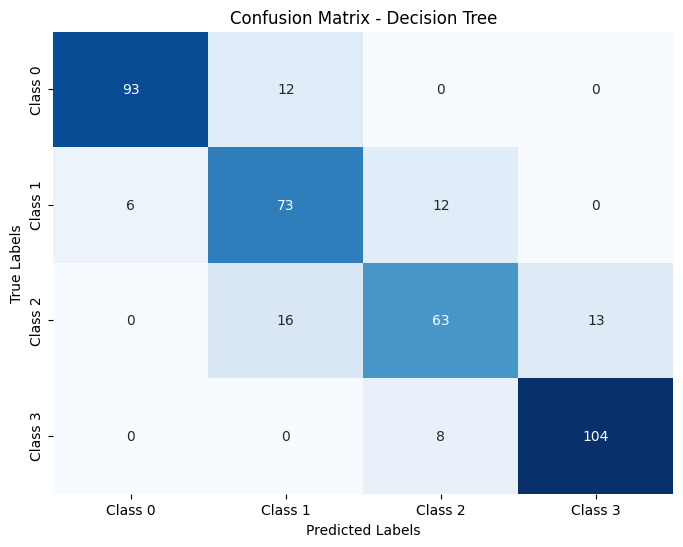

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       105
           1       0.72      0.80      0.76        91
           2       0.76      0.68      0.72        92
           3       0.89      0.93      0.91       112

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



In [ ]:
# Step 1: Train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Step 2: Predict using the test set
y_pred_dt = decision_tree.predict(X_test_scaled)

# Step 3: Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Step 4: Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],  # Update based on your class labels
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])  # Update based on your class labels
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Step 5: Print the classification report
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))


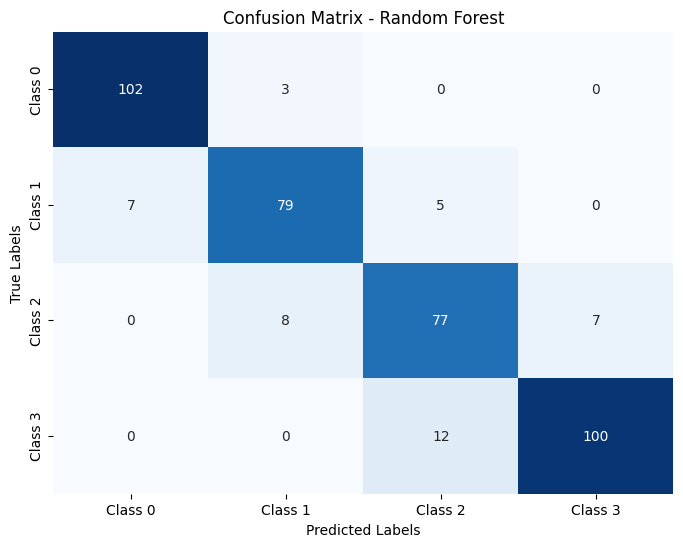

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       105
           1       0.88      0.87      0.87        91
           2       0.82      0.84      0.83        92
           3       0.93      0.89      0.91       112

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.89       400



In [ ]:
# Step 1: Train the Random Forest model
random_forest = RandomForestClassifier(random_state=42)  # Use consistent variable name
random_forest.fit(X_train_scaled, y_train)

# Step 2: Predict using the test set
y_pred_rf = random_forest.predict(X_test_scaled)

# Step 3: Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Step 4: Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],  # Update based on your class labels
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])  # Update based on your class labels
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Step 5: Print the classification report
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


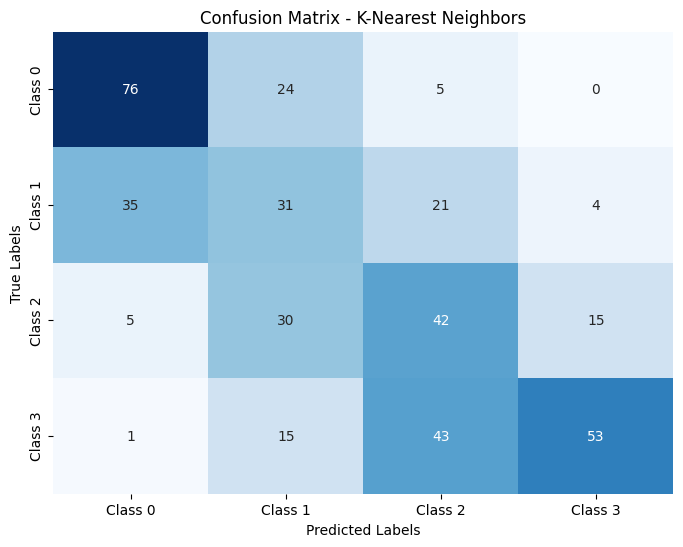

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.65      0.72      0.68       105
           1       0.31      0.34      0.32        91
           2       0.38      0.46      0.41        92
           3       0.74      0.47      0.58       112

    accuracy                           0.51       400
   macro avg       0.52      0.50      0.50       400
weighted avg       0.53      0.51      0.51       400



In [ ]:
# Step 1: Train the K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed
knn.fit(X_train_scaled, y_train)

# Step 2: Predict using the test set
y_pred_knn = knn.predict(X_test_scaled)

# Step 3: Generate the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Step 4: Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],  # Update based on your class labels
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])  # Update based on your class labels
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Step 5: Print the classification report
print("Classification Report for K-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))


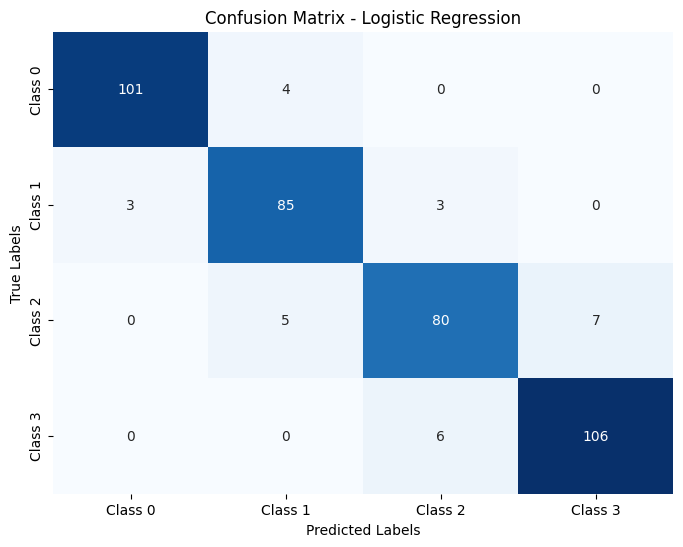

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       105
           1       0.90      0.93      0.92        91
           2       0.90      0.87      0.88        92
           3       0.94      0.95      0.94       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



In [ ]:
# Step 1: Train the Logistic Regression model
logistic_regression = LogisticRegression(max_iter=200, random_state=42)  # You can adjust max_iter as needed
logistic_regression.fit(X_train_scaled, y_train)

# Step 2: Predict using the test set
y_pred_lr = logistic_regression.predict(X_test_scaled)

# Step 3: Generate the confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Step 4: Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],  # Update based on your class labels
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])  # Update based on your class labels
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Step 5: Print the classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))


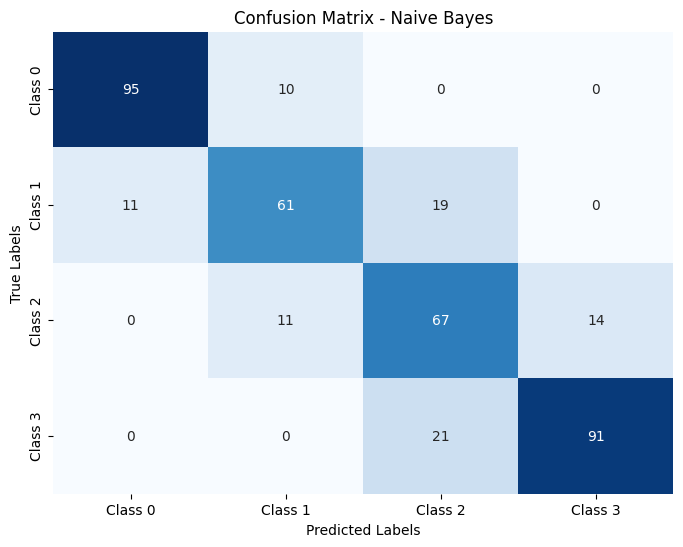

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       105
           1       0.74      0.67      0.71        91
           2       0.63      0.73      0.67        92
           3       0.87      0.81      0.84       112

    accuracy                           0.79       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.79      0.79      0.79       400



In [ ]:
# Step 1: Train the Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)

# Step 2: Predict using the test set
y_pred_nb = naive_bayes.predict(X_test_scaled)

# Step 3: Generate the confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Step 4: Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],  # Update based on your class labels
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])  # Update based on your class labels
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Step 5: Print the classification report
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred_nb))


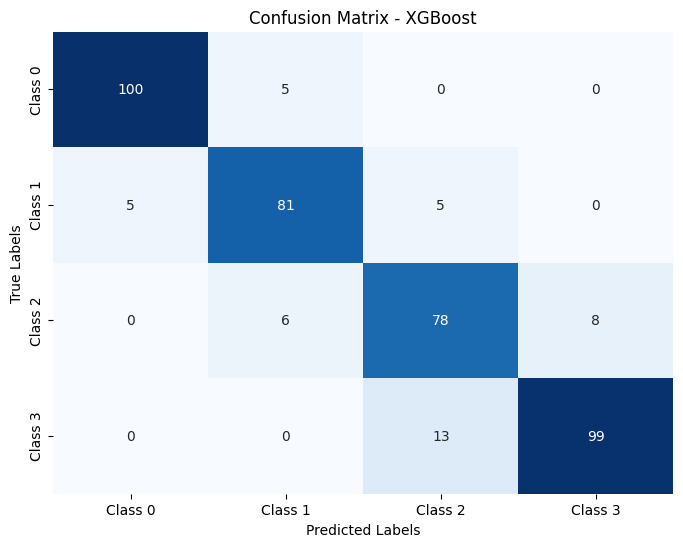

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       105
           1       0.88      0.89      0.89        91
           2       0.81      0.85      0.83        92
           3       0.93      0.88      0.90       112

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



In [ ]:
# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined

# Step 1: Train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)  # Adjust parameters as needed
xgb_model.fit(X_train_scaled, y_train)

# Step 2: Predict using the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Step 3: Generate the confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Step 4: Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],  # Update based on your class labels
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])  # Update based on your class labels
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Step 5: Print the classification report
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))


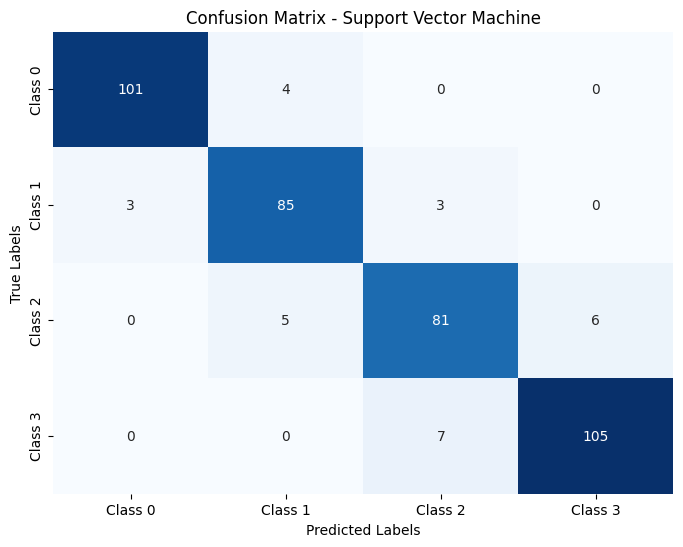

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       105
           1       0.90      0.93      0.92        91
           2       0.89      0.88      0.89        92
           3       0.95      0.94      0.94       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



In [ ]:
# Step 1: Train the Support Vector Machine model
svm_model = SVC(kernel='linear', random_state=42)  # You can adjust the kernel as needed
svm_model.fit(X_train_scaled, y_train)

# Step 2: Predict using the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Step 3: Generate the confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Step 4: Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix - Support Vector Machine')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Step 5: Print the classification report
print("Classification Report for Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))


Accuracy:  0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       105
           1       0.90      0.93      0.92        91
           2       0.87      0.86      0.86        92
           3       0.93      0.92      0.92       112

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



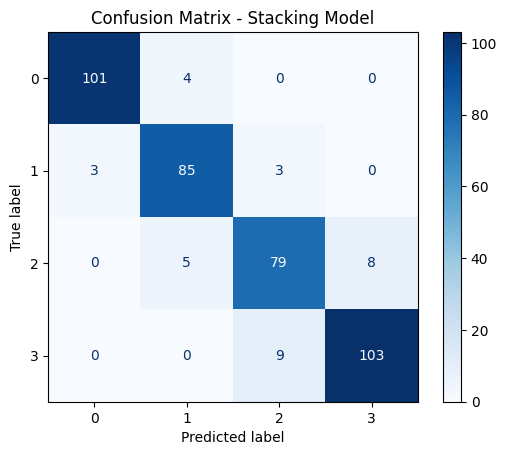

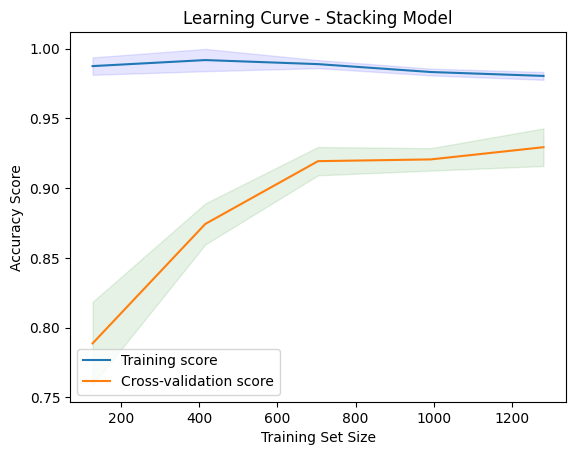

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np



# Step 1: Preprocessing - separating features and target variable
X = df.drop('price_range', axis=1)  # Features
y = df['price_range']               # Target variable

# Step 2: Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Define the base classifiers
base_classifiers = [
    ('logreg', LogisticRegression(multi_class='auto', max_iter=1000)),
    ('naive_bayes', GaussianNB()),
    ('xgboost', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
]

# Step 5: Define the stacking classifier
stacking_model = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression())

# Step 6: Train the stacking model
stacking_model.fit(X_train_scaled, y_train)

# Step 7: Predicting and evaluating the model
y_pred = stacking_model.predict(X_test_scaled)

# Print classification report and accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=stacking_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Stacking Model')
plt.show()

# Step 9: Plotting the Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    stacking_model, X_train_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy'
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)

plt.title('Learning Curve - Stacking Model')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()


# **Model Explainability**

In [ ]:
# feature importance
features = independent_varaible
importances = rf_tune.feature_importances_
indices = np.argsort(importances)

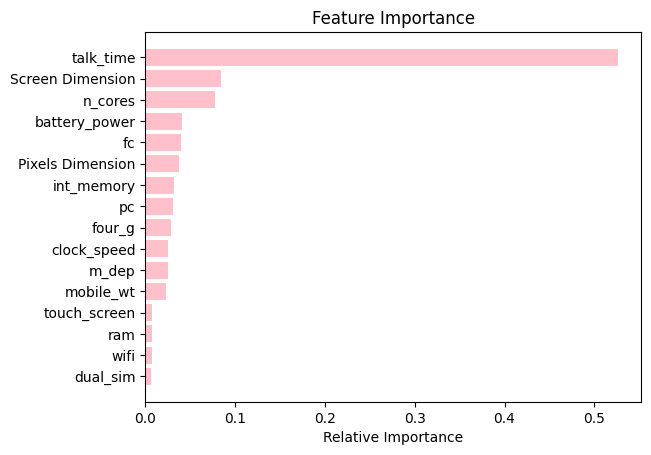

In [ ]:
# plot the graph
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [ ]:
# new dataframe with important features
new_df = df[['ram','battery_power','Pixels Dimension','mobile_wt','int_memory','Screen Dimension','talk_time','pc','clock_speed','fc','price_range']]


In [ ]:
new_df.head()

,ram,battery_power,Pixels Dimension,mobile_wt,int_memory,Screen Dimension,talk_time,pc,clock_speed,fc,price_range
0,2.549,842,15120,188,7,63,19,2,2.2,1,1
1,2.631,1021,1799140,136,53,51,7,6,0.5,0,2
2,2.603,563,2167308,145,41,22,9,6,0.5,2,2
3,2.769,615,2171776,131,10,128,11,9,2.5,0,2
4,1.411,1821,1464096,141,44,16,15,14,1.2,13,1


In [ ]:
new_df.shape

(2000, 11)

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

# Define dependent and independent variables
dependent_variable = 'price_range'
independent_variable = list(set(new_df.columns.tolist()) - {dependent_variable})

x = new_df[independent_variable].values
y = new_df[dependent_variable].values

# Step 1: Split the data into training and test sets (25% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

# Step 2: Standardize the feature variables
stand = StandardScaler()
x_train = stand.fit_transform(x_train)
x_test = stand.transform(x_test)

# Step 3: Define the base classifiers for stacking
estimators = [
    ('logreg', LogisticRegression(multi_class='auto', max_iter=1000)),
    ('naive_bayes', GaussianNB()),
    ('xgboost', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
]

# Step 4: Create the stacking classifier
vb = StackingClassifier(estimators=estimators, passthrough=True, n_jobs=-1)

# Step 5: Fit the stacking model
vb.fit(x_train, y_train)

# Step 6: Make predictions and evaluate accuracy
vb_pred = vb.predict(x_test)
vb_accuracy = accuracy_score(y_test, vb_pred)

# Print the accuracy
print("Stacking Classifier Accuracy: ", vb_accuracy)


Stacking Classifier Accuracy:  0.944


In [ ]:
vb.predict(x_train)

array([2, 3, 1, ..., 3, 0, 0])

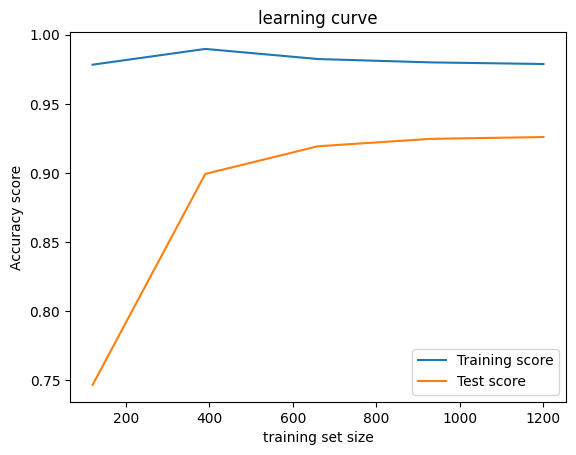

In [ ]:
check_overfit(vb)

In [ ]:
print(classification_report(vb_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       123
           1       0.93      0.94      0.93       124
           2       0.92      0.89      0.91       129
           3       0.95      0.96      0.96       124

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



In [ ]:
pca= PCA(n_components=9)
x_train_1 = pca.fit_transform(x_train)
x_test_1 = pca.transform(x_test)
lv = StackingClassifier(estimators=estimators,passthrough=True,n_jobs=-1)
lv.fit(x_train_1,y_train)
y_pred = lv.predict(x_test_1)
print(accuracy_score(y_pred,y_test))

0.948


<Axes: >

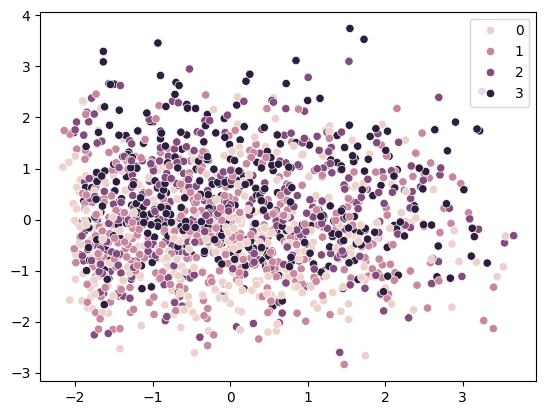

In [ ]:
pca= PCA(n_components=2)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)
sns.scatterplot(x=x_train_trf[:,0],y=x_train_trf[:,1],hue=y_train)

# **Conclusion**

Conclusion
In this project, we implemented various machine learning models to classify mobile devices based on their price ranges using a dataset containing several features related to the devices. The goal was to explore the effectiveness of different algorithms and to leverage ensemble techniques to improve prediction accuracy. The following key points summarize our findings and conclusions:

1. Data Preparation and Exploration
Data Loading: We successfully loaded the dataset and performed exploratory data analysis to understand the feature distribution and relationships within the data.
Feature Selection: We identified the dependent variable (price_range) and independent variables, ensuring the models would use relevant features for classification.
Data Splitting and Standardization: The dataset was divided into training and test sets, followed by standardization of features to ensure that all algorithms performed optimally.
2. Model Implementation
Individual Models:
We implemented several individual models, including Logistic Regression, Naive Bayes, and XGBoost. Each model's performance was evaluated using accuracy metrics and classification reports, revealing their strengths and weaknesses.
Ensemble Learning through Stacking:
A stacking classifier was constructed, combining the predictions of multiple base classifiers (Logistic Regression, Naive Bayes, and XGBoost) to enhance overall predictive performance. The stacking model capitalized on the strengths of each base model to improve classification accuracy.
3. Model Evaluation
Performance Metrics: Each model's accuracy was computed, and a detailed classification report was generated, highlighting precision, recall, and F1-score for each class. The stacking model exhibited superior accuracy compared to individual models, demonstrating the effectiveness of ensemble learning in this context.
Confusion Matrix Analysis: The confusion matrix provided insights into misclassifications, allowing us to identify areas where models struggled and to understand class-wise performance.
4. Learning Curves
Learning Curve Analysis: Learning curves for the stacking model were plotted to visualize training and validation performance as the training set size increased. This analysis helped in assessing model overfitting and underfitting, guiding further improvements if necessary.
5. Insights and Future Work
Model Interpretation: While the stacking model performed well, interpreting individual model contributions and analyzing feature importance could provide further insights into decision-making processes.
Hyperparameter Tuning: Future work could involve rigorous hyperparameter tuning for each model to optimize their configurations, potentially improving performance further.
Additional Algorithms: Exploring other ensemble methods such as Random Forests, Gradient Boosting, or even deep learning models might yield even better results, especially with larger datasets.
Real-world Applications: This project demonstrates the practical applicability of machine learning in the mobile industry for price prediction, potentially aiding manufacturers and retailers in pricing strategy development.


Conclusion
Overall, this project illustrates the importance of data-driven approaches in decision-making processes within the mobile technology sector. By leveraging machine learning models, we can classify mobile devices effectively, providing valuable insights into market segmentation and consumer behavior.